<a href="https://colab.research.google.com/github/roveen001/roveen001/blob/main/TrafficLightRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import os
import numpy as np
import pandas as pd
import random as rn
from PIL import Image 
import seaborn as sns
from pathlib import Path
import tensorflow as tf
import matplotlib.pyplot as plt 
from keras.optimizers import Adam
from keras.regularizers import l1_l2
from keras.models import Model, Sequential
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization


In [27]:
# VGG16 Model 
model = VGG16()
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

# Image pre-processing and **Augmentation** 

In [28]:
BATCH_SIZE = 150 #43 
HEIGHT, WIDTH = 50,50 
#128
SEED = 42
CHANNELS = 3

# naming the classes
classes = {0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)', 
            2:'Speed limit (50km/h)', 
            3:'Speed limit (60km/h)', 
            4:'Speed limit (70km/h)', 
            5:'Speed limit (80km/h)', 
            6:'End of speed limit (80km/h)', 
            7:'Speed limit (100km/h)', 
            8:'Speed limit (120km/h)', 
            9:'No passing', 
            10:'No passing veh over 3.5 tons', 
            11:'Right-of-way at intersection', 
            12:'Priority road', 
            13:'Yield', 
            14:'Stop', 
            15:'No vehicles', 
            16:'Veh > 3.5 tons prohibited', 
            17:'No entry', 
            18:'General caution', 
            19:'Dangerous curve left', 
            20:'Dangerous curve right', 
            21:'Double curve', 
            22:'Bumpy road', 
            23:'Slippery road', 
            24:'Road narrows on the right', 
            25:'Road work', 
            26:'Traffic signals', 
            27:'Pedestrians', 
            28:'Children crossing', 
            29:'Bicycles crossing', 
            30:'Beware of ice/snow',
            31:'Wild animals crossing', 
            32:'End speed + passing limits', 
            33:'Turn right ahead', 
            34:'Turn left ahead', 
            35:'Ahead only', 
            36:'Go straight or right', 
            37:'Go straight or left', 
            38:'Keep right', 
            39:'Keep left', 
            40:'Roundabout mandatory', 
            41:'End of no passing', 
            42:'End no passing veh > 3.5 tons' }


In [29]:
train_generator = ImageDataGenerator(rescale = 1./255,
                                     #rotation_range=90,
                                     validation_split=0.2,
                                     #brightness_range=[0.1, 0.7],
                                     #width_shift_range=0.5, 
                                     #height_shift_range=0.5,
                                     #horizontal_flip=True, 
                                     #vertical_flip=True,
                                     preprocessing_function=preprocess_input) # VGG16 preprocessing

test_generator = ImageDataGenerator(preprocessing_function=preprocess_input) 

# Train and Validataion 
## Using Keras Data Generators

In [30]:
# lets define the output dir path
data_dir = Path('drive/MyDrive/archive/Meta')
train_dir = Path('drive/MyDrive/archive/Train')
test_dir = Path('drive/MyDrive/archive/Test')

In [31]:
traingen = train_generator.flow_from_directory(train_dir,
                                               target_size=(HEIGHT,WIDTH),
                                               class_mode='categorical',
                                               interpolation='bilinear',
                                               subset='training',
                                               batch_size=BATCH_SIZE, 
                                               shuffle=True,
                                               seed=SEED)

validgen = train_generator.flow_from_directory(train_dir,
                                               target_size=(HEIGHT,WIDTH),
                                               class_mode='categorical',
                                               interpolation='bilinear',
                                               subset='validation',
                                               batch_size=BATCH_SIZE,
                                               shuffle=True,
                                               seed=SEED)

#testgen = test_generator.flow_from_directory(test_dir,
#                                             target_size=(HEIGHT,WIDTH),
#                                             class_mode='categorical',
#                                             batch_size=1,
#                                             shuffle=False,
#                                             seed=SEED)

Found 7337 images belonging to 43 classes.
Found 1834 images belonging to 43 classes.


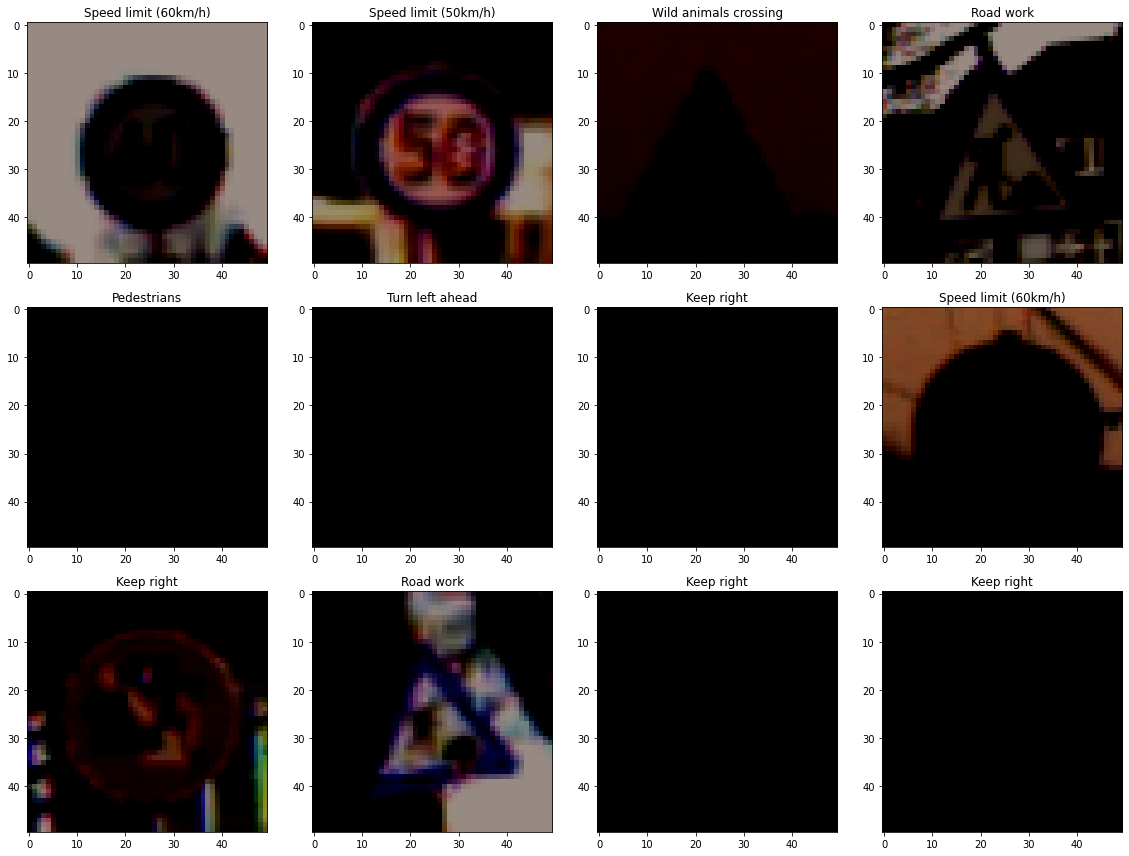

In [32]:
#display the images
fig,ax=plt.subplots(3,4)
fig.set_size_inches(16,12)
img,y = traingen.next()
for i in range(3):
    for j in range (4):
        l=rn.randint(0,BATCH_SIZE-1)
        label = classes[int(list(traingen.class_indices.keys())[np.argmax(y[l])])]
        ax[i,j].imshow(img[l])
        ax[i,j].set_title(label)

plt.tight_layout()


In [8]:
# model



# Feature Extraction
Without using fine tuining

In [34]:
vgg_model = Sequential([VGG16(weights='imagenet',include_top=False, input_shape=(HEIGHT,WIDTH,3)),
                        # start from the given dimension
                        # ßConv2D(filters=128, kernel_size=(3,3), activation='relu'),
                        # MaxPooling2D(pool_size=(2, 2)),
                        BatchNormalization(),
                        
                        Flatten(),
                        Dense(512, activation='relu'),
                        BatchNormalization(),
                        Dropout(rate=0.5),
                      
                        Dense(43, activation='softmax')
                        
                        ])
                        
                        
vgg_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 batch_normalization_10 (Bat  (None, 1, 1, 512)        2048      
 chNormalization)                                                
                                                                 
 flatten_5 (Flatten)         (None, 512)               0         
                                                                 
 dense_10 (Dense)            (None, 512)               262656    
                                                                 
 batch_normalization_11 (Bat  (None, 512)              2048      
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 512)              

In [38]:
# loading the pre-trained model
OPTIM1=Adam(learning_rate=0.001)
# NTRAIN_STEPS = traingen.samples // BATCH_SIZE
# NVALID_STEPS = validgen.samples // BATCH_SIZE

EPOCHS = 15
#NCLASSES = 43


#get the traning model
vgg_model.compile(optimizer=OPTIM1, loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
vgg_history = vgg_model.fit(traingen,
                            steps_per_epoch=len(traingen),
                            epochs=EPOCHS, 
                            validation_data=validgen,
                            validation_steps=len(validgen))

Epoch 1/15
49/49 [==============================] - 1245s 25s/step - loss: 3.3872 - accuracy: 0.2327 - val_loss: 2516.5559 - val_accuracy: 0.0000e+00
Epoch 2/15
49/49 [==============================] - 940s 19s/step - loss: 1.6818 - accuracy: 0.4749 - val_loss: 27.0457 - val_accuracy: 0.2257
Epoch 3/15
49/49 [==============================] - 950s 19s/step - loss: 1.0822 - accuracy: 0.6256 - val_loss: 40.4587 - val_accuracy: 0.2257
Epoch 4/15
49/49 [==============================] - 966s 20s/step - loss: 0.6545 - accuracy: 0.7701 - val_loss: 52.6746 - val_accuracy: 0.2257
Epoch 5/15
49/49 [==============================] - 968s 20s/step - loss: 0.3605 - accuracy: 0.8794 - val_loss: 49.0193 - val_accuracy: 0.2257
Epoch 6/15
49/49 [==============================] - 951s 19s/step - loss: 0.2369 - accuracy: 0.9178 - val_loss: 45.6912 - val_accuracy: 0.2257
Epoch 7/15
49/49 [==============================] - 942s 19s/step - loss: 0.1578 - accuracy: 0.9497 - val_loss: 37.0521 - val_accuracy:

# Performance


In [ ]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(16,12)
performance = pd.DataFrame(vgg_history.history)
plt.figure(figsize=(10,7))
ax[1].plot(performance[['loss','val_loss']])
ax[1].legend(['Training Loss', 'Validation Loss'])
ax[1].set_title('Model Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].set_ylim(0,1)
ax[0].plot(performance[['accuracy','val_accuracy']])
ax[0].legend(['Training Accuracy', 'Validation Accuracy'])
ax[0].set_title('Model Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_ylim(0.5,1)
fig.suptitle('Custom CNN Performance')
plt.show()